<h3>Linear Regression</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
number_of_points = 200
x_point = []
y_point = []

a = 0.22
b = 0.78

In [3]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = a*x + b +np.random.normal(0.0,0.1)
    x_point.append([x])
    y_point.append([y])

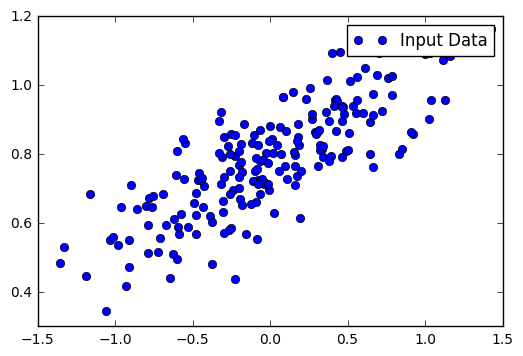

In [4]:
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend()
plt.show()

In [5]:
A = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = A * x_point + B

In [6]:
cost_function = tf.reduce_mean(tf.square(y - y_point))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(cost_function)
model = tf.global_variables_initializer()

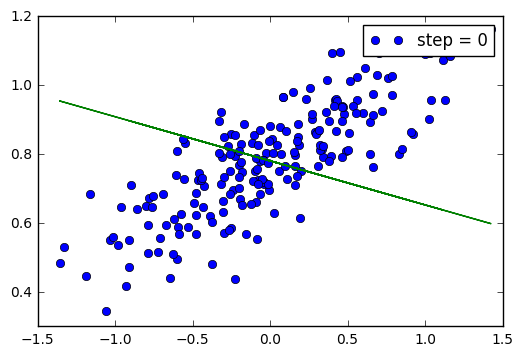

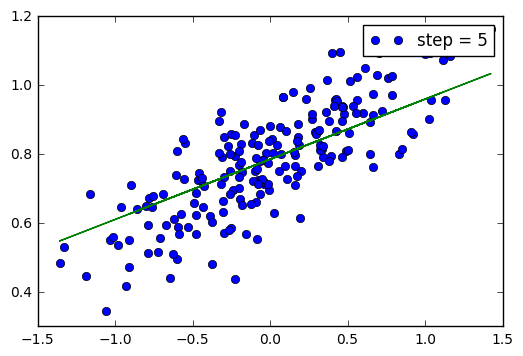

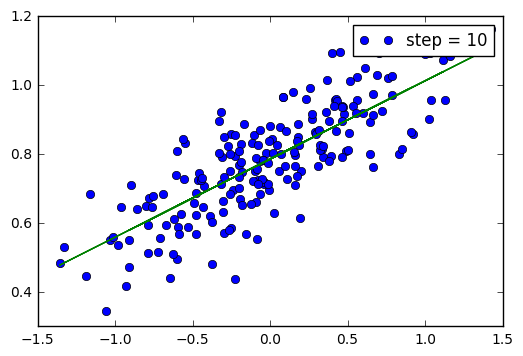

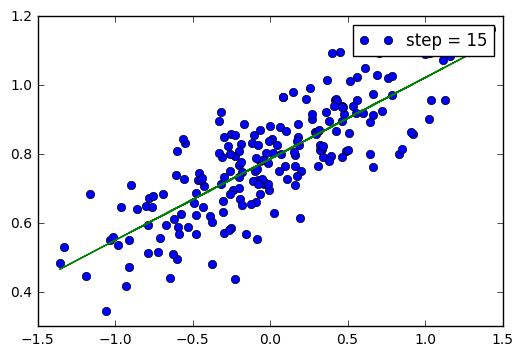

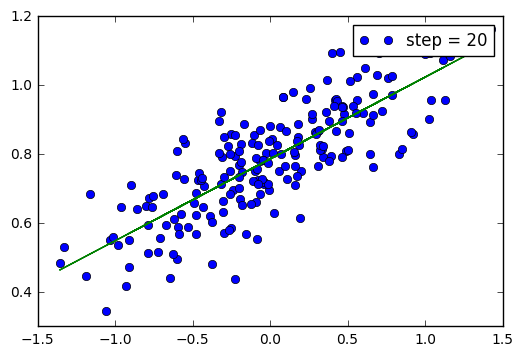

In [7]:
with tf.Session() as session:
    session.run(model)
    for step in range(0,21):
        session.run(train)
        if (step % 5) == 0:
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point,session.run(A)*x_point+session.run(B))
            plt.legend()
            plt.show()

In [8]:
import input_data
import numpy as np
import matplotlib.pyplot as plt

In [9]:
mnist_images = input_data.read_data_sets("MNIST_data/",one_hot=False)
pixels,real_values = mnist_images.train.next_batch(10)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
print("list of values loaded ", real_values)
example_to_visualize = 5
print("element N " + str(example_to_visualize + 1) + " of the list plotted")

list of values loaded  [2 4 1 8 6 2 4 4 8 9]
element N 6 of the list plotted


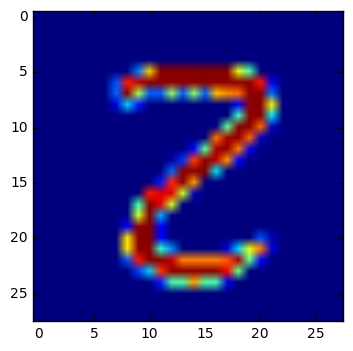

In [11]:
image = pixels[example_to_visualize,:]
image = np.reshape(image, [28,28])
plt.imshow(image)
plt.show()

<h3>KNN</h3>

In [12]:
import numpy as np
import tensorflow as tf
import input_data

In [13]:
#학습 데이터 집합 제작
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [14]:
train_pixels,train_list_values = mnist.train.next_batch(100)
test_pixels,test_list_of_values = mnist.test.next_batch(10)
train_pixel_tensor = tf.placeholder("float", [None, 784])
test_pixel_tensor = tf.placeholder("float", [784])

In [15]:
# 비용 함수와 거리 최적화
distance = tf.reduce_sum(tf.abs(tf.add(train_pixel_tensor,tf.negative(test_pixel_tensor))),reduction_indices=1)

In [16]:
pred = tf.arg_min(distance, 0)

In [17]:
# 테스트와 알고리즘 평가
accuracy = 0

In [18]:
init = tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(len(test_list_of_values)):
        nn_index = sess.run(pred,feed_dict={train_pixel_tensor:train_pixels,test_pixel_tensor:test_pixels[i,:]})
        print("Test N° ", i,"Predicted Class: ", np.argmax(train_list_values[nn_index]),"True Class: ", np.argmax(test_list_of_values[i]))
        if np.argmax(train_list_values[nn_index]) == np.argmax(test_list_of_values[i]):
            accuracy += 1./len(test_pixels)
        print("Result = ", accuracy)

Test N°  0 Predicted Class:  2 True Class:  2
Result =  0.1
Test N°  1 Predicted Class:  6 True Class:  6
Result =  0.2
Test N°  2 Predicted Class:  8 True Class:  8
Result =  0.30000000000000004
Test N°  3 Predicted Class:  1 True Class:  3
Result =  0.30000000000000004
Test N°  4 Predicted Class:  3 True Class:  3
Result =  0.4
Test N°  5 Predicted Class:  9 True Class:  9
Result =  0.5
Test N°  6 Predicted Class:  2 True Class:  2
Result =  0.6
Test N°  7 Predicted Class:  6 True Class:  6
Result =  0.7
Test N°  8 Predicted Class:  5 True Class:  0
Result =  0.7
Test N°  9 Predicted Class:  1 True Class:  1
Result =  0.7999999999999999


<h3>K-Means</h3>

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

In [21]:
num_vectors = 1000
num_clusters = 4
num_steps = 100

In [22]:
x_values = []
y_values = []
vector_values = []

In [23]:
for i in range(num_vectors):
    if np.random.random() > 0.5:
        x_values.append(np.random.normal(0.4, 0.7))
        y_values.append(np.random.normal(0.2, 0.8))
    else:
        x_values.append(np.random.normal(0.6, 0.4))
        y_values.append(np.random.normal(0.8, 0.5))

In [24]:
vector_values = list(zip(x_values,y_values))
vectors = tf.constant(vector_values)

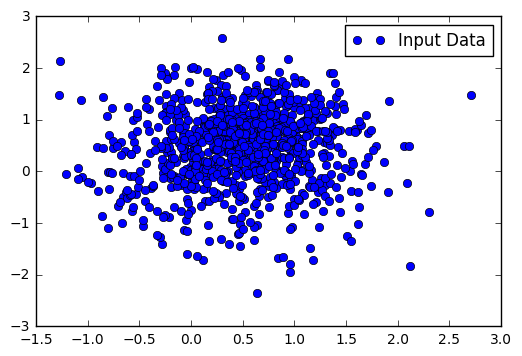

In [25]:
plt.plot(x_values,y_values, 'o', label='Input Data')
plt.legend()
plt.show()

In [26]:
n_samples = tf.shape(vector_values)[0]
random_indices = tf.random_shuffle(tf.range(0, n_samples))

In [27]:
begin = [0,]
size = [num_clusters,]
size[0] = num_clusters

In [28]:
centroid_indices = tf.slice(random_indices, begin, size)
centroids = tf.Variable(tf.gather(vector_values, centroid_indices))

In [29]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

In [30]:
vectors_subtration = tf.subtract(expanded_vectors,expanded_centroids)

In [31]:
euclidean_distances = tf.reduce_sum(tf.square(vectors_subtration), 2)
assignments = tf.to_int32(tf.argmin(euclidean_distances, 0))

In [32]:
partitions = tf.dynamic_partition(vectors, assignments, num_clusters)

In [33]:
update_centroids = tf.concat([tf.expand_dims(tf.reduce_mean(partition, 0), 0) for partition in partitions],0)

In [34]:
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

In [35]:
for step in range(num_steps):
    _, centroid_values, assignment_values = sess.run([update_centroids,centroids,assignments])

In [36]:
def display_partition(x_values,y_values,assignment_values):
    labels = []
    colors = ["red","blue","green","yellow"]
    for i in range(len(assignment_values)):
        labels.append(colors[(assignment_values[i])])
    color = labels
    df = pd.DataFrame(dict(x =x_values,y = y_values ,color = labels ))
    fig, ax = plt.subplots()
    ax.scatter(df['x'], df['y'], c=df['color'])
    plt.show()

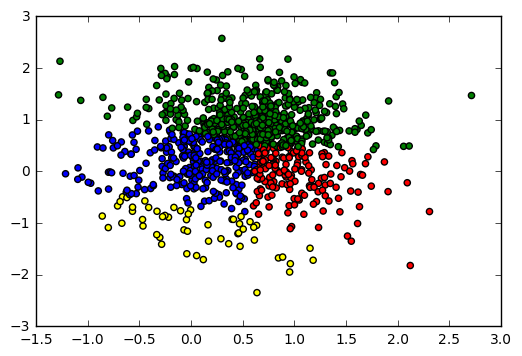

In [37]:
display_partition(x_values,y_values,assignment_values)

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [39]:
def display_partition(x_values,y_values,assignment_values):
    labels = []
    colors = ["red","blue","green","yellow"]
    for i in range(len(assignment_values)):
        labels.append(colors[(assignment_values[i])])
    color = labels
    df = pd.DataFrame(dict(x =x_values,y = y_values ,color = labels ))
    fig, ax = plt.subplots()
    ax.scatter(df['x'], df['y'], c=df['color'])
    plt.show()

In [40]:
num_vectors = 2000
num_clusters = 4
n_samples_per_cluster = 500
num_steps = 1000
x_values = []
y_values = []
vector_values = []

In [41]:
# 랜덤한 데이터 생성
for i in range(num_vectors):
    if np.random.random() > 0.5:
        x_values.append(np.random.normal(0.4, 0.7))
        y_values.append(np.random.normal(0.2, 0.8))
    else:
        x_values.append(np.random.normal(0.6, 0.4))
        y_values.append(np.random.normal(0.8, 0.5))

In [42]:
vector_values = list(zip(x_values,y_values))
vectors = tf.constant(vector_values)
n_samples = tf.shape(vector_values)[0]

In [43]:
random_indices = tf.random_shuffle(tf.range(0, n_samples))
begin = [0,]
size = [num_clusters,]
size[0] = num_clusters
centroid_indices = tf.slice(random_indices, begin, size)
centroids = tf.Variable(tf.gather(vector_values,centroid_indices))

In [44]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)
vectors_subtration = tf.subtract(expanded_vectors,expanded_centroids)

In [45]:
euclidean_distances = tf.reduce_sum(tf.square(vectors_subtration), 2)
assignments = tf.to_int32(tf.argmin(euclidean_distances, 0))
partitions = [0, 0, 1, 1, 0]
num_partitions = 2
data = [10, 20, 30, 40, 50]

In [46]:
partitions = tf.dynamic_partition(vectors, assignments, num_clusters)
update_centroids = tf.concat([tf.expand_dims (tf.reduce_mean(partition, 0), 0) for partition in partitions], 0)

In [47]:
init_op = tf.global_variables_initializer()

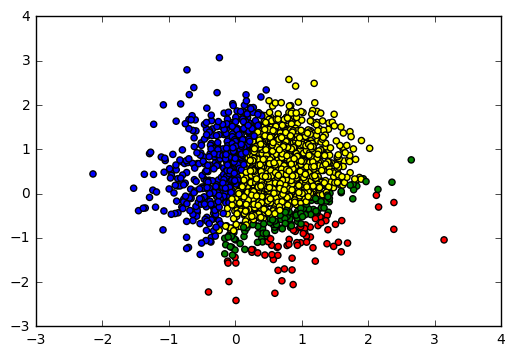

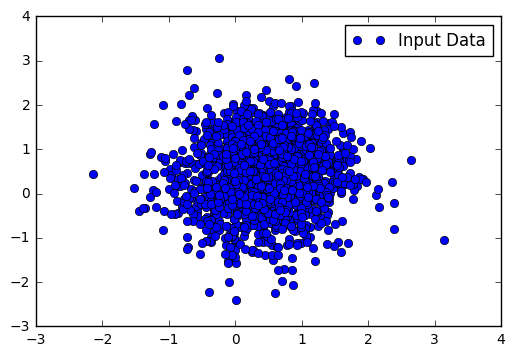

In [48]:
sess = tf.Session()
sess.run(init_op)
for step in range(num_steps):
    _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])
display_partition(x_values,y_values,assignment_values)
plt.plot(x_values,y_values, 'o', label='Input Data')
plt.legend()
plt.show()